In [19]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn.linear_model import LinearRegression

%matplotlib inline

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

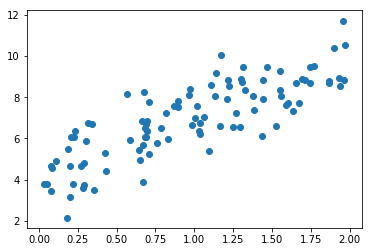

In [6]:
plt.scatter(X, y);

In [7]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.28147819],
       [2.74035345]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # prepend 1 on each subarray, eg:
# [[0]  -> [[1, 0]
#  [2]] -> [[1, 2]]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [13]:
y_pred = X_new_b.dot(theta_best)
y_pred

array([[4.28147819],
       [9.76218509]])

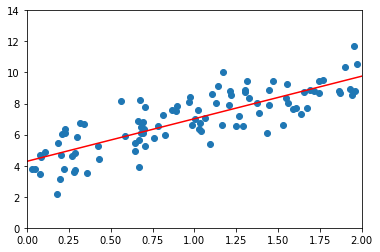

In [18]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, 'r-')
plt.axis([0, 2, 0, 14]);

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(array([4.28147819]), array([[2.74035345]]))

In [21]:
lin_reg.predict(X_new)

array([[4.28147819],
       [9.76218509]])

In [23]:
theta_best_svd, resids, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.28147819],
       [2.74035345]])

In [25]:
resids

array([114.46935711])